In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

# Преобразование Бокса-Кокса

Если случайная величина имеет логнормальное распределение, то ее логарифм имеет нормальное распределение.

In [2]:
data_log = pd.Series(np.random.lognormal(0, 1, 1000))

<AxesSubplot:>

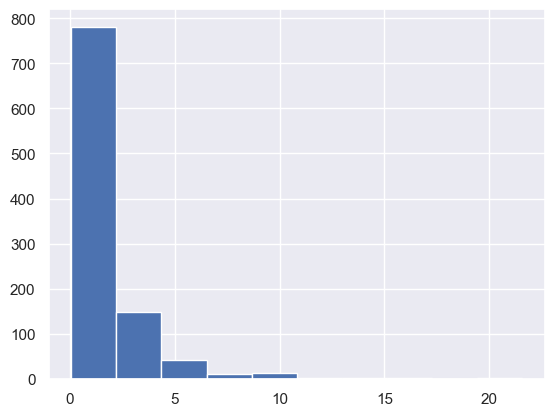

In [3]:
data_log.hist()

<AxesSubplot:>

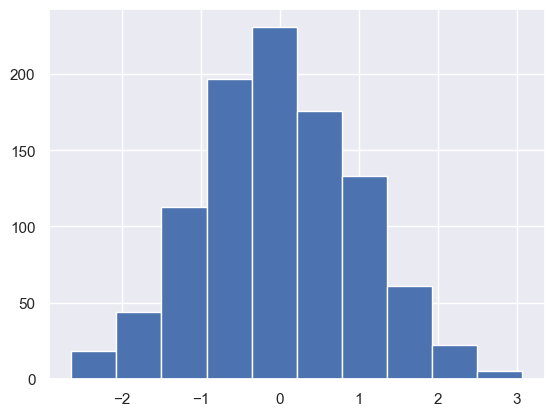

In [4]:
np.log(data_log).hist()

Почему это работает?

C:\Users\Админ\AppData\Local\Temp\ipykernel_13716\4063628510.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


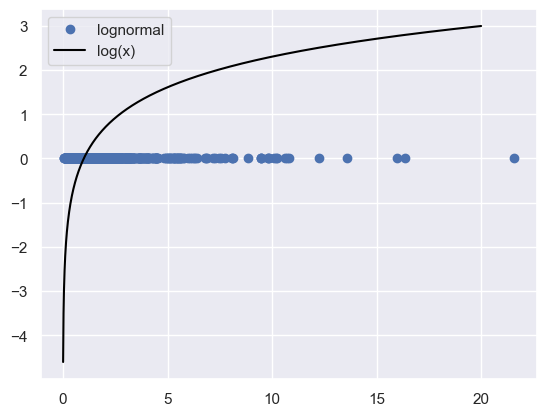

In [5]:
log_x = np.arange(0.01, 20, 0.01)
log_y = np.log(log_x)

x_points = data_log
y_points = np.zeros(1000)

fig = plt.figure()
plt.plot(x_points, y_points, 'o', label="lognormal")
plt.plot(log_x, log_y, 'black', label='log(x)')

plt.legend()

fig.show()

Если экспоненциальное распределение?

In [6]:
data_exp = pd.Series(np.random.exponential(size=1000))

<AxesSubplot:>

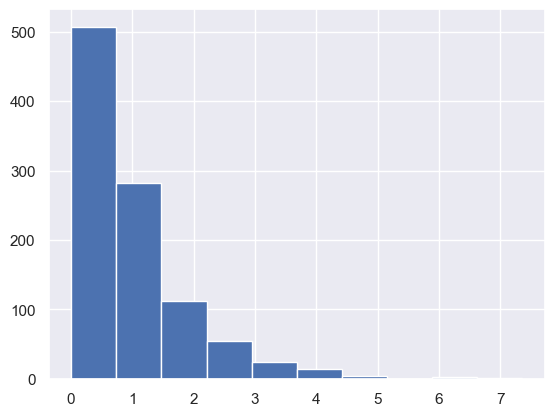

In [7]:
data_exp.hist()

<AxesSubplot:>

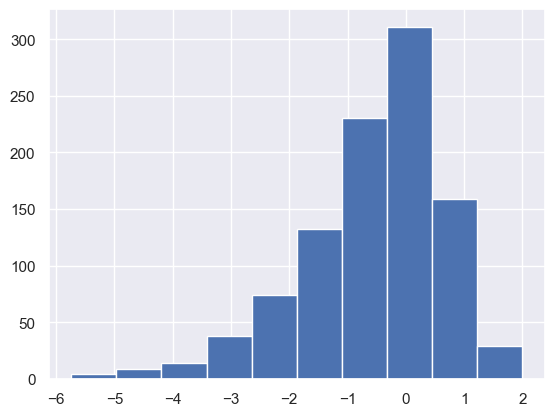

In [8]:
np.log(data_exp).hist()

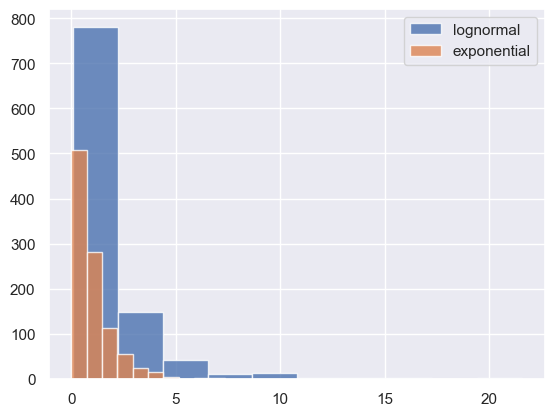

In [9]:
plt.hist(data_log, label='lognormal', alpha=.8)
plt.hist(data_exp, label='exponential', alpha=.8)
plt.legend()

plt.show()

Найдем такое преобразование.

$$\int\frac{1}{x^{1-\lambda}}=\frac{x^\lambda-1}{\lambda}+C,$$
где $\lambda$ - искомый параметр.

$$x^*_i=\begin{cases}
\ln(x), & \lambda=0 \\
\frac{x^\lambda-1}{\lambda}, & \text{в обратном случае.}
\end{cases}$$

In [10]:
from scipy.stats import boxcox
transformed_data, best_lambda = boxcox(data_exp)

<AxesSubplot:>

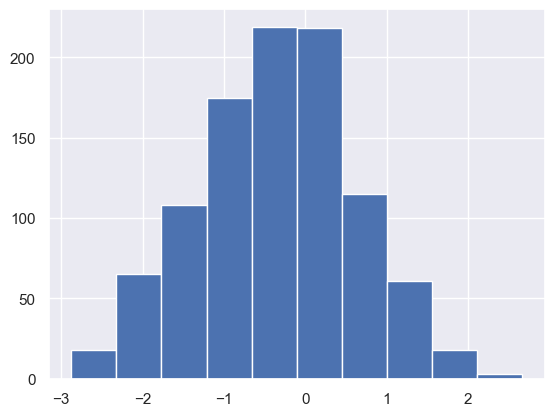

In [11]:
pd.Series(transformed_data).hist()

In [12]:
best_lambda

0.27662511850023025

# Отбор признаков

In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
X = df[['battery-capacity', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury',
             'max-speed', 'power-electro-kw','valves','weight','configurations_auto-premiere','configurations_back-wheel-base','configurations_tank-volume',
             'supergen_year-stop']]
y = df[["target"]]


In [44]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

## Корреляционный анализ

In [15]:
train_X.columns

Index(['back-suspension', 'battery-capacity', 'charge-time', 'compression',
       'consumption-mixed', 'cylinders-order', 'cylinders-value',
       'engine-feeding', 'engine-start', 'engine-stop', 'engine-type',
       'gear-type', 'luxury', 'max-speed', 'power-electro-kw', 'supply-system',
       'valves', 'valvetrain', 'weight', 'configurations_auto-premiere',
       'configurations_back-wheel-base', 'configurations_front-brake',
       'configurations_safety-rating', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_group', 'models_light-and-commercial',
       'models_male'],
      dtype='object')

In [16]:
ordinal = ['back-suspension', 'cylinders-order', 'engine-feeding', 'configurations_seats']
numerical = ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury',
             'max-speed', 'power-electro-kw','valves','weight','configurations_auto-premiere','configurations_back-wheel-base','configurations_tank-volume',
             'supergen_year-stop',]
catigorial = ['engine-type','gear-type', 'supply-system', 'valvetrain', 'configurations_front-brake', 'configurations_safety-rating','models_country-from',
              'models_group', 'models_light-and-commercial','models_male']

<AxesSubplot:xlabel='engine-type', ylabel='Count'>

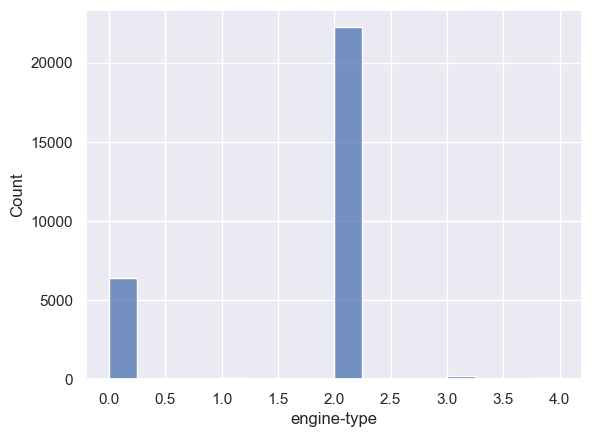

In [17]:
sns.histplot(data=train_X, x='engine-type')

KeyboardInterrupt: 

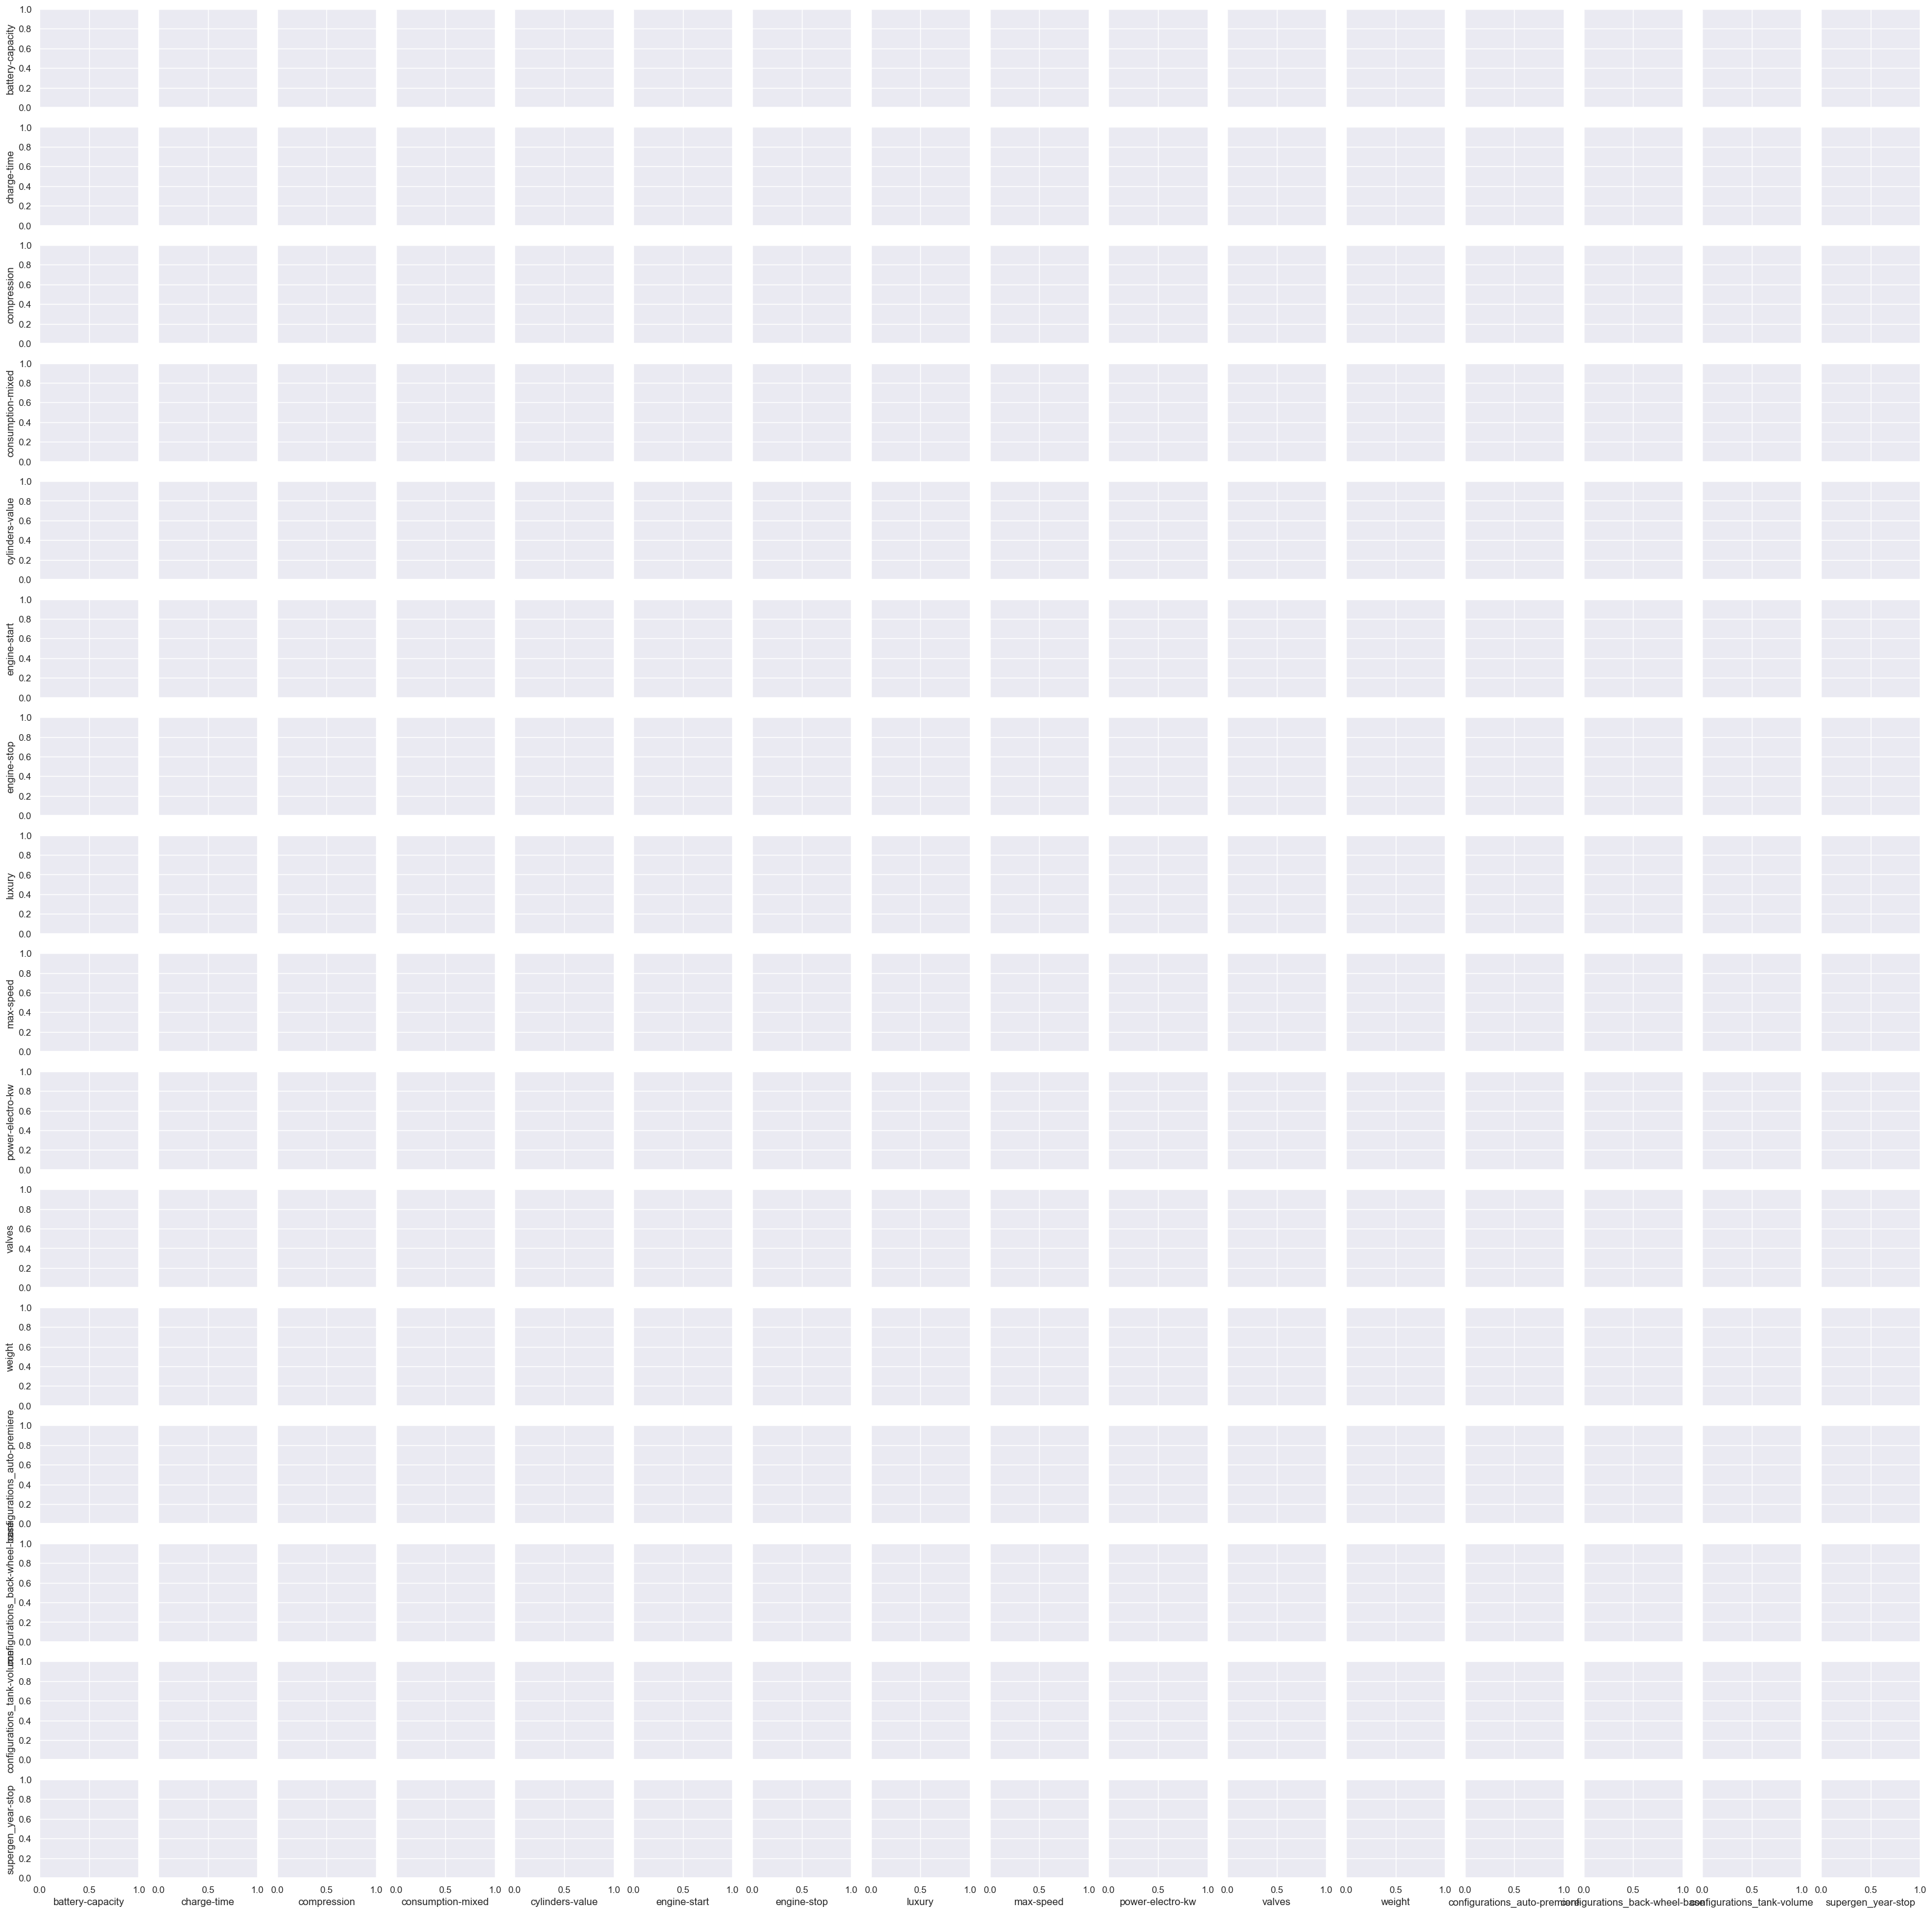

In [18]:
sns.pairplot(train_X[numerical]);

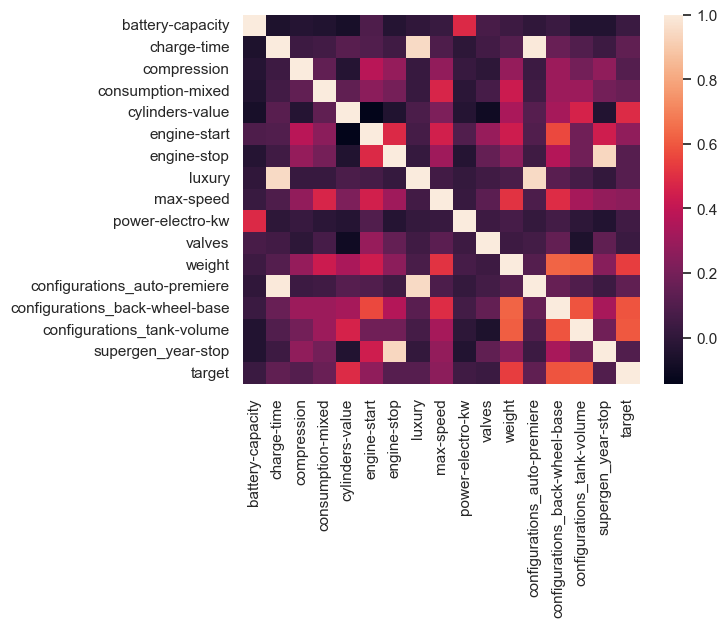

In [21]:
train = train_X
train['target'] = train_y
sns.heatmap(train[numerical + ['target']].corr(method='spearman'));

In [22]:
from scipy.stats import pearsonr, spearmanr

r = pearsonr(train['configurations_auto-premiere'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.11003752360955568 p-value: 9.725646829197532e-79


In [23]:
r = pearsonr(train['battery-capacity'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.023665183667100777 p-value: 5.610547363580777e-05


P-значение — это статистическое измерение, используемое для проверки гипотезы на основе наблюдаемых данных . Значение p измеряет вероятность получения наблюдаемых результатов при условии, что нулевая гипотеза верна. Чем ниже значение p, тем выше статистическая значимость наблюдаемой разницы.

## F-test

In [24]:
from sklearn.feature_selection import f_regression, SelectKBest

In [25]:
f_statistic, p_values = f_regression(train_X, train_y)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: divide by zero encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [26]:
p_values

array([4.14261514e-178, 5.61054736e-005, 2.22583374e-084, 4.29215233e-006,
       5.19880608e-097, 0.00000000e+000, 0.00000000e+000, 3.00761649e-002,
       1.23407205e-153, 1.91780781e-122, 1.08128701e-102, 5.89170255e-038,
       1.18423856e-051, 6.73034264e-090, 6.04804785e-008, 3.29025321e-015,
       3.33873440e-033, 1.45689423e-002, 0.00000000e+000, 9.72564683e-079,
       6.46321123e-022, 5.15233301e-231, 8.63015515e-002, 0.00000000e+000,
       0.00000000e+000, 1.90641086e-122, 7.01981268e-140, 5.09638729e-005,
       4.56879391e-064, 3.51507643e-001, 0.00000000e+000])

In [27]:
sekector = SelectKBest(f_regression, k=20)
sekector.fit_transform(train_X, train_y)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: divide by zero encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


array([[ 3.0000e+00,  1.1636e+04, -1.0000e+00, ...,  1.6000e+01,
         0.0000e+00,  2.4300e+03],
       [ 8.0000e+00,  3.1764e+04, -1.0000e+00, ...,  2.3000e+01,
         0.0000e+00,  2.4400e+03],
       [ 8.0000e+00,  2.7730e+03,  6.8000e+00, ...,  1.0000e+01,
         0.0000e+00,  2.6850e+03],
       ...,
       [ 3.0000e+00,  4.8819e+04,  7.6000e+00, ...,  2.6000e+01,
         0.0000e+00,  2.6700e+03],
       [ 1.0000e+01,  9.3460e+03, -1.0000e+00, ...,  1.6000e+01,
         0.0000e+00,  2.5000e+03],
       [ 3.0000e+00,  4.3309e+04, -1.0000e+00, ...,  3.5000e+01,
         0.0000e+00,  2.8800e+03]])

In [28]:
sekector.get_feature_names_out()

array(['back-suspension', 'charge-time', 'consumption-mixed',
       'cylinders-order', 'cylinders-value', 'engine-start',
       'engine-stop', 'engine-type', 'gear-type', 'luxury', 'max-speed',
       'weight', 'configurations_auto-premiere',
       'configurations_front-brake', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_light-and-commercial', 'target'],
      dtype=object)

## Значения Шепли

In [29]:
import shap

In [30]:
reg = LinearRegression().fit(train_X, train_y)
reg

LinearRegression()

In [31]:
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)

ValueError: operands could not be broadcast together with shapes (1,30) (31,) 

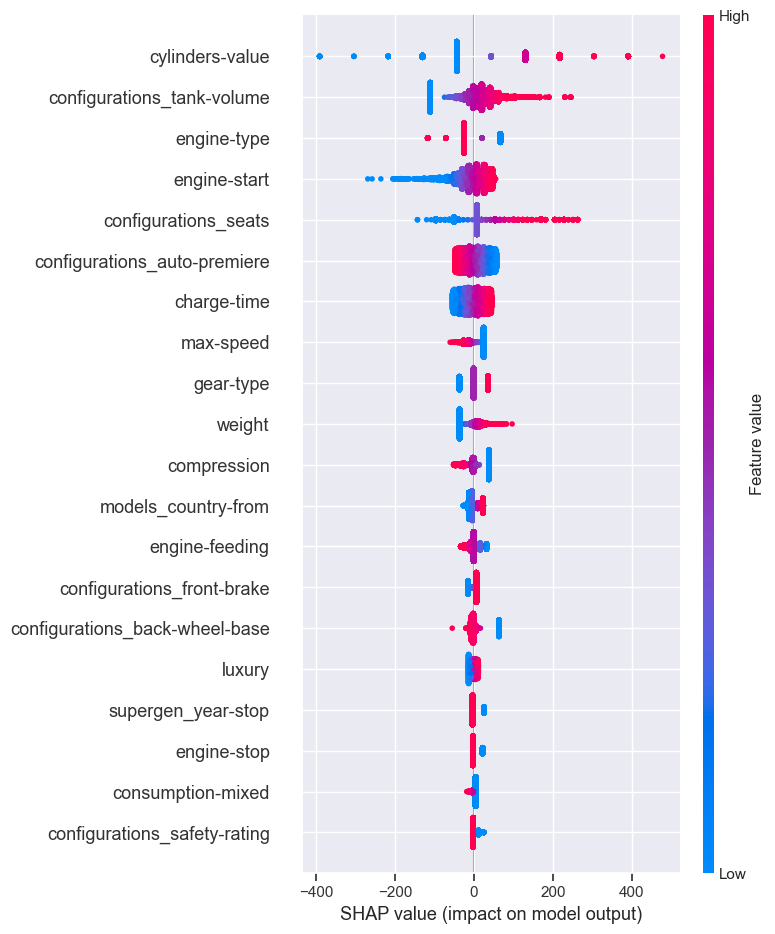

In [31]:
shap.summary_plot(shap_values, test_X)

Для признака cylinders-value наблюдается положительная статистическая зависимость от целевой переменной. Сравните Ваш результат с результатом работы библиотеки shap.

In [122]:
train_cut_X = train_X[train_X.columns[:5]]
test_cut_X = test_X[train_X.columns[:5]]

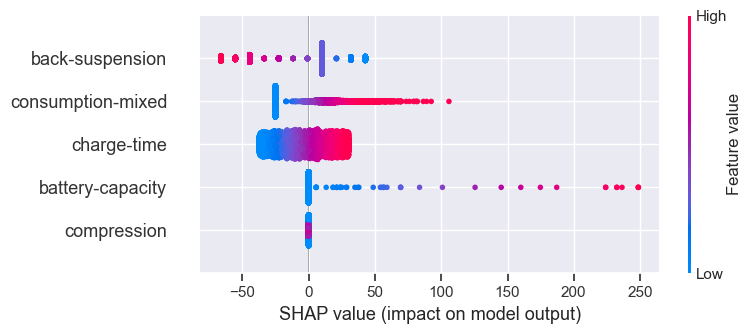

In [42]:
reg = LinearRegression().fit(train_cut_X, train_y)

explainer = shap.Explainer(reg, train_cut_X)
shap_values = explainer(test_cut_X)

shap.summary_plot(shap_values, test_cut_X)

### Задание

Для сокращенных данных (train_cut_X и test_cut_X) реализовать метод отбора важности признаков по Шепли.

In [7]:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [8]:
N =['back-suspension', 'consumption-mixed', 'charge-time', 'battery-capacity', 'compression']

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [10]:
train_cut_X

,back-suspension,battery-capacity,charge-time,compression,consumption-mixed
22607,3,-1.0,11636,9.5,-1.0
36531,8,-1.0,31764,9.0,-1.0
24048,8,-1.0,2773,8.8,6.8
34819,3,-1.0,52039,14.0,5.3
1328,3,-1.0,20689,18.0,7.5
...,...,...,...,...,...
6265,6,-1.0,42729,16.5,4.7
11284,0,-1.0,46093,8.1,-1.0
38158,3,-1.0,48819,10.0,7.6
860,10,-1.0,9346,22.4,-1.0


In [11]:
shap = {}
for i in N:
    train_cut_X2 = train_cut_X
    test_cut_X2 = test_cut_X
    S = list(powerset(train_cut_X2.drop(i, axis=1)))
    sum_ = 0
    for n in S:
        n = np.math.factorial(len(S))*np.math.factorial(len(S)-len(N))/np.math.factorial(len(N))
        fi = LinearRegression().fit(train_cut_X2.drop(i, axis=1), train_y)
        predictionsi = fi.predict(test_cut_X2.drop(i, axis=1))
        f = LinearRegression().fit(train_cut_X, train_y)
        predictions = f.predict(test_cut_X)
        sum_ += n*(r2_score(test_y, predictions) - r2_score(test_y, predictionsi))
    shap[i] = sum_
    print("Значения важности признаков по Шепли:", shap[i], "для", i, "фактора.")


Значения важности признаков по Шепли: 1.5238249819623194e+18 для back-suspension фактора.
Значения важности признаков по Шепли: 9.298594032474049e+17 для consumption-mixed фактора.
Значения важности признаков по Шепли: 6.309612939175085e+17 для charge-time фактора.
Значения важности признаков по Шепли: 1.4931275540524627e+17 для battery-capacity фактора.
Значения важности признаков по Шепли: 533213223294098.25 для compression фактора.


## Пермутационная важность

In [70]:
import eli5
from eli5.sklearn import PermutationImportance

In [13]:
reg = LinearRegression().fit(train_cut_X, train_y)

In [14]:
perm = PermutationImportance(reg, random_state=42).fit(test_cut_X, test_y)

In [15]:
eli5.show_weights(perm, feature_names=list(test_cut_X.columns))

Weight,Feature
0.0310 ± 0.0033,back-suspension
0.0187 ± 0.0022,consumption-mixed
0.0118 ± 0.0021,charge-time
0.0026 ± 0.0001,battery-capacity
0.0000 ± 0.0000,compression


back-suspension
battery-capacity
charge-time
compression
consumption-mixed

### Задание

Самостоятельно реализовать алгоритм отбора признаков на основе пермутационной важности. Построить гистограмму полученных значений.

In [16]:
reg = LinearRegression().fit(train_cut_X, train_y)

In [17]:
mean_squared_error(reg.predict(test_cut_X), test_y)

55826.515413742876

In [18]:
import random
for i in N:
    test_cut_X2 = test_cut_X
    test_cut_X2[i] = test_cut_X2[i].replace(test_cut_X2[i].tolist(), test_cut_X2[i].sample(frac=1).tolist())
    reg_new = LinearRegression().fit(test_cut_X2, test_y)
    print(i,  "фактор, средняя ошибка =", mean_squared_error(reg_new.predict(test_cut_X2), test_y),', коэффициент корреляции =', r2_score(test_y, reg_new.predict(test_cut_X2)) * 100, "%")


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


back-suspension фактор, средняя ошибка = 54900.03210019536 , коэффициент корреляции = 5.25091204654331 %



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


consumption-mixed фактор, средняя ошибка = 55419.74272183987 , коэффициент корреляции = 4.353970723983203 %



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


charge-time фактор, средняя ошибка = 55714.2533462232 , коэффициент корреляции = 3.8456902733999376 %



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


battery-capacity фактор, средняя ошибка = 55765.982405924995 , коэффициент корреляции = 3.756413800510272 %
compression фактор, средняя ошибка = 55768.03743537969 , коэффициент корреляции = 3.752867132883664 %



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Домашнее задание

Сгенерировать полиномиальные признаки для рассматриваегомого сегодня набора данных. Попробовать отобрать признаки различными методами (можно теми, что не рассматривали). Получить максимальное качество на тестовых данных. Проинтерпретировать результаты.

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(train_X)
X_poly_test = poly_features.fit_transform(test_X)
X_poly_train

array([[-1.000000e+00,  1.163600e+04,  9.500000e+00, ...,  2.500000e+03,
         1.000000e+05,  4.000000e+06],
       [-1.000000e+00,  3.176400e+04,  9.000000e+00, ...,  2.304000e+03,
         9.580800e+04,  3.984016e+06],
       [-1.000000e+00,  2.773000e+03,  8.800000e+00, ...,  3.136000e+03,
         1.126720e+05,  4.048144e+06],
       ...,
       [-1.000000e+00,  4.881900e+04,  1.000000e+01, ...,  3.844000e+03,
        -6.200000e+01,  1.000000e+00],
       [-1.000000e+00,  9.346000e+03,  2.240000e+01, ...,  2.500000e+03,
         9.975000e+04,  3.980025e+06],
       [-1.000000e+00,  4.330900e+04,  1.010000e+01, ...,  4.356000e+03,
         1.324620e+05,  4.028049e+06]])

In [46]:
X_poly_train = pd.DataFrame(data=X_poly_train)
X_poly_test = pd.DataFrame(data=X_poly_test)

In [47]:
f_statistic, p_values = f_regression(X_poly_train, train_y)
p_values

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array([5.61054736e-005, 2.22583374e-084, 4.29215233e-006, 5.19880608e-097,
       0.00000000e+000, 1.23407205e-153, 1.91780781e-122, 1.18423856e-051,
       6.73034264e-090, 6.04804785e-008, 3.33873440e-033, 0.00000000e+000,
       9.72564683e-079, 6.46321123e-022, 0.00000000e+000, 1.90641086e-122,
       1.04279598e-003, 5.13286284e-001, 1.18373649e-001, 1.63870545e-072,
       1.78677030e-162, 7.10099505e-005, 1.10327484e-009, 1.38194928e-001,
       4.37431047e-001, 2.77344634e-003, 2.07153073e-005, 5.62541201e-010,
       3.74889231e-001, 1.98948944e-002, 2.80255750e-187, 1.09938266e-011,
       9.49278405e-087, 2.02680119e-064, 2.14436854e-127, 0.00000000e+000,
       4.48409067e-087, 6.08446495e-007, 5.59008149e-064, 1.52561794e-143,
       1.58938191e-003, 6.98432123e-023, 0.00000000e+000, 1.37668031e-082,
       3.34978356e-109, 0.00000000e+000, 8.99252678e-006, 1.08674081e-015,
       6.58087371e-071, 2.19570795e-189, 1.18707494e-006, 2.75736463e-007,
       4.43683501e-044, 1

In [59]:
selector = SelectKBest(f_regression, k=110)
train_x = pd.DataFrame(selector.fit_transform(X_poly_train, train_y), columns = selector.get_feature_names_out())
test_x = pd.DataFrame(selector.transform(X_poly_test), columns = selector.get_feature_names_out())

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [60]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
reg_new = Ridge().fit(train_x , train_y)
predictions = reg_new.predict(test_x)
print(reg_new.coef_, reg_new.intercept_)
# проверяем r2
r2 = r2_score(test_y, predictions) 
r2

[[ 1.61999249e-01  2.71032866e+02  3.25676077e+02 -4.98504005e+02
   1.58704355e+00 -1.63975256e-01  1.08597525e+01 -4.84193944e-01
   7.57909582e-01 -4.58302901e-02  5.81450335e+00 -4.96173686e+01
  -2.60951817e+00 -3.95695454e+00  1.35653879e+00  3.43002599e-03
  -1.18632850e-03 -1.03760347e-01 -3.48458389e-03  1.63955999e-07
  -6.83064890e-05 -2.37413193e-05 -3.52466848e-05 -8.42916361e-05
  -8.49877826e-09  1.01251077e-05  2.70284355e-06  6.97586694e-07
  -1.57819030e-07  1.68339608e-06 -1.64700273e-06  8.38023819e-02
  -1.78936836e-01 -4.27713819e-01 -7.98313887e-05  1.07739444e-02
  -1.68057991e-03  1.77941199e-04  5.40448722e-04 -1.33300134e-02
  -7.60029997e-05 -6.58777396e-01  1.46067709e+00 -1.31699459e-01
  -4.82736029e-03  1.17987417e-05  3.38934298e-03 -1.67123745e-03
   1.89531237e-05 -1.45759750e-03 -4.12486018e-02  2.39212458e-03
   3.95620943e-01 -1.09950951e-01  2.05407183e-02  3.94034181e-04
  -1.64250618e-01 -1.63320734e-02 -1.61307925e-04 -2.80255417e-02
  -4.70363

Ill-conditioned matrix (rcond=7.6765e-24): result may not be accurate.


0.6099642695297913

In [61]:
mean_squared_error(reg_new.predict(train_x), train_y)

21970.21342284217

In [62]:
mean_squared_error(reg_new.predict(test_x), test_y)

22599.66252504323

<AxesSubplot:>

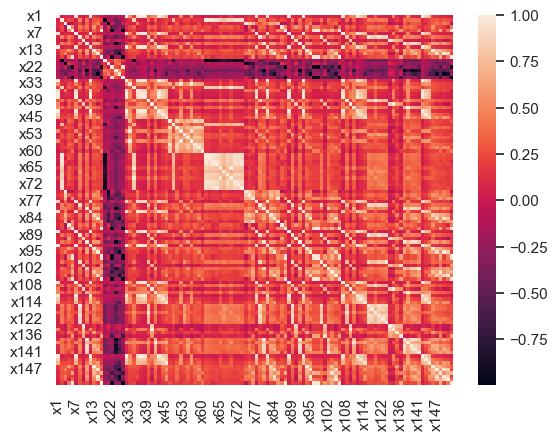

In [63]:
sns.heatmap(train_x.corr(method='spearman'))

Как видно, очень много мультиколлинеарных переменных.

Данный прогноз был построен путем отбора полиномиальных признаков через f-критерий. 
Далее попробуем через Шепли и пермутационную важность.

Шепли

In [65]:
reg = LinearRegression().fit(X_poly_train, train_y)
print(reg.coef_, reg.intercept_)
predictions = reg.predict(X_poly_test)
# проверяем r2
r2 = r2_score(test_y, predictions) 
r2

[[-2.66106501e+02 -3.38594567e-02 -1.92063142e+01  2.91307741e+02
   7.61623956e+02 -4.80919097e+02  1.35852807e+00 -4.91227249e-02
   9.97306263e+00  8.59612161e+01 -1.00114067e+00  8.97238891e-01
   1.15813484e-02  5.79997191e+00 -5.68959597e+01 -2.61688345e+00
  -7.09317601e-02 -4.09935509e-05 -1.91830310e-01  1.29871876e+00
  -1.66385015e+00  1.37950308e-01  1.45108437e-02  1.84716974e-04
   6.52435314e-03  1.23461837e-02  4.52771181e-04 -2.60932360e-03
  -8.12097934e-05 -2.41772192e-03 -9.92794608e-02 -1.66862104e-02
   1.24200369e-07 -1.09632518e-04  1.16878492e-04  4.28435987e-04
   1.52129100e-05  7.72714793e-06  3.35133024e-08  1.15007148e-05
  -1.52177652e-06  3.51232728e-06  2.02773400e-07 -1.10886560e-07
  -1.23857796e-06 -1.04675806e-05 -7.95995537e-06  1.13531780e-01
  -1.91502775e-01  1.43399744e-01  7.06137518e-03  1.54736988e-03
  -3.73540035e-05  1.42013285e-02  2.55412623e-03 -4.36908041e-04
  -1.81199884e-03  1.85427133e-04  1.59003442e-03 -2.65602035e-02
  -1.29244

0.6116675698560895

In [66]:
explainer = shap.Explainer(reg, X_poly_train)
shap_values = explainer(X_poly_test)

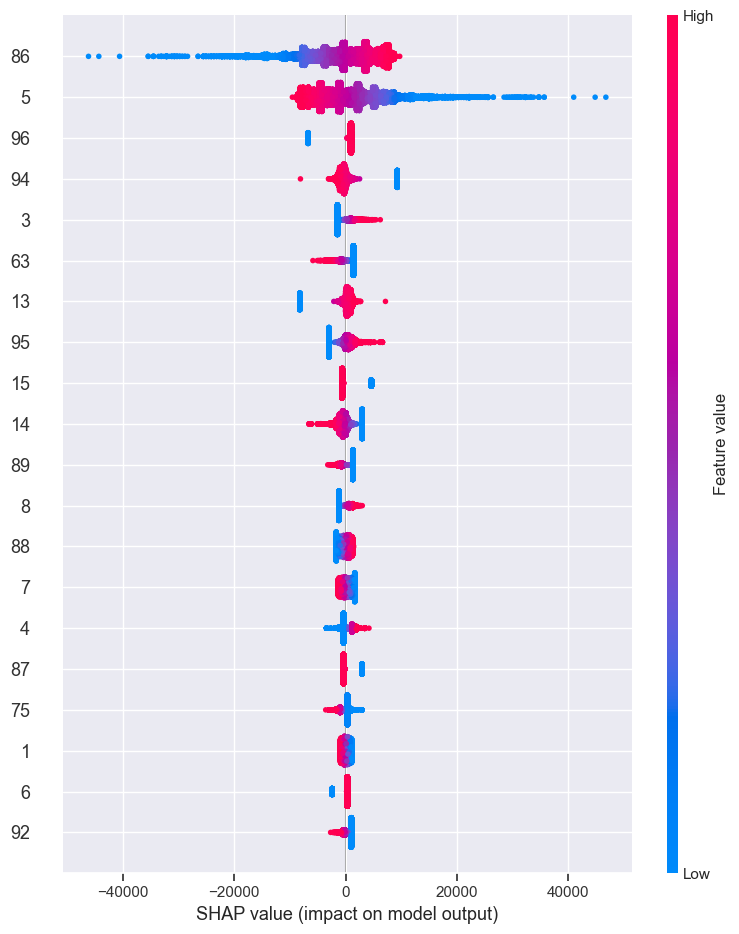

In [67]:
shap.summary_plot(shap_values, X_poly_test)

Пермутационная важность

In [71]:
perm = PermutationImportance(reg, random_state=42).fit(X_poly_test, test_y)

In [72]:
eli5.show_weights(perm)

Weight,Feature
1467.7526 ± 28.1491,x86
1445.7218 ± 18.6614,x5
225.7404 ± 3.8275,x94
191.6350 ± 1.4787,x96
177.2826 ± 1.6737,x13
89.4185 ± 1.0231,x15
70.2055 ± 1.1135,x95
68.8302 ± 1.1607,x14
66.2937 ± 1.0432,x3
60.7965 ± 0.2684,x63


Оба теста показывают, что признаки под номером 29 и 491 оказывают наисильнейшее влияние. Далее идут факторы 8 и 242. Добавим их в модель (+19).

<AxesSubplot:>

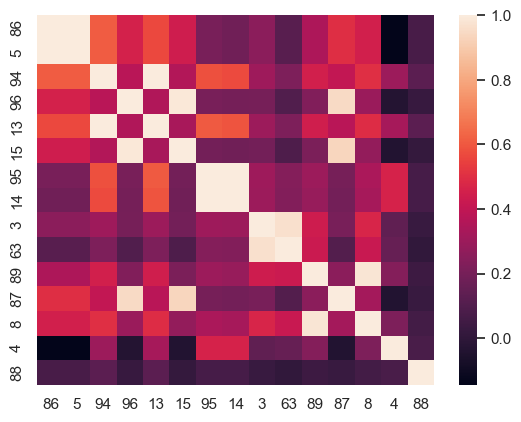

In [83]:
sns.heatmap(X_poly_train[[86, 5, 94, 96, 13, 15, 95, 14, 3, 63, 89, 87, 8, 4, 88]].corr(method='spearman'))

Как видно, это коррелируемые признаки (т.е. один является квадратом другого). Если строить регрессию по данным признакам, возникнет мультиколлинеарность. Попробуем построить регрессию только по квадратам наиболее значимых признаков.

In [91]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
reg_new = Lasso().fit(X_poly_train[[86, 5, 94, 96, 13, 15, 95, 14, 3, 63, 89, 87, 8, 4, 88, 7, 90]], train_y)
predictions = reg_new.predict(X_poly_test[[86, 5, 94, 96, 13, 15, 95, 14, 3, 63, 89, 87, 8, 4, 88, 7, 90]])
print(reg_new.coef_, reg_new.intercept_)
# проверяем r2
r2 = r2_score(test_y, predictions) 
r2

[ 3.16336923e-03 -1.07525384e+01  2.33115731e-04 -1.23955449e-05
 -5.31818980e-01  6.37857115e-03  6.30082670e-03 -9.54991877e+00
 -0.00000000e+00 -5.62312355e-04  4.66620003e-04 -1.34175508e-05
 -1.09809925e+00  8.35715606e+01  2.19000903e-06 -4.06241945e-03
  6.33365400e-04] [11156.36273931]


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.134e+08, tolerance: 1.588e+05


0.3718271529598264

In [85]:
mean_squared_error(reg_new.predict(X_poly_train[[86, 5, 94, 96, 13, 15, 95, 14, 3, 63, 89, 87, 8, 4, 88, 7, 90]]), train_y)

32471.897073209388

In [86]:
mean_squared_error(reg_new.predict(X_poly_test[[86, 5, 94, 96, 13, 15, 95, 14, 3, 63, 89, 87, 8, 4, 88, 7, 90]]), test_y)

33379.758219289164

<AxesSubplot:>

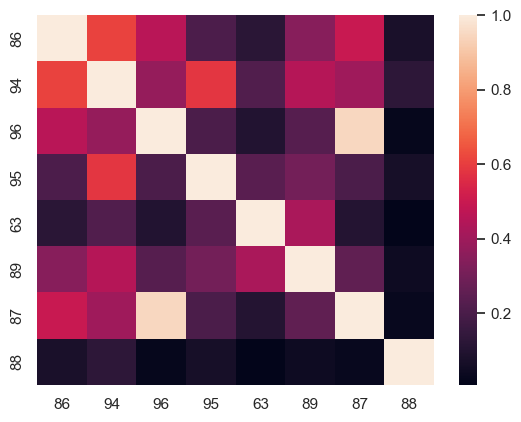

In [87]:
sns.heatmap(X_poly_train[[86, 94, 96, 95, 63, 89, 87, 88]].corr(method='spearman'))

In [90]:
reg_new = LinearRegression().fit(X_poly_train[[86, 94, 96, 95, 63, 89, 87, 88]], train_y)
predictions = reg_new.predict(X_poly_test[[86, 94, 96, 95, 63, 89, 87, 88]])
print(reg_new.coef_, reg_new.intercept_)
# проверяем r2
r2 = r2_score(test_y, predictions) 
r2

[[-3.65356388e-05 -4.04975269e-05 -1.23249609e-05  2.22789017e-03
   1.15157618e-04 -1.26325138e-05 -1.33433669e-05  3.55724916e-07]] [2754.61569236]


0.21845436294269072

Так, мы избегаем случая возможной коллинеарности. Правда, показатель детерминации очень низкий, а ошибка высокая. Стоит больше признаков использовать для регрессии.